# **Project Name**    -



##### **Project Type**    - Unsupervised Machine Learning (Clustering and NLP_Sentiment Analysis)
##### **Contribution**    - Individual - Aiman Sahay

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [161]:
# Import Libraries

# Data Manipulation
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 100)
import datetime as dt

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import missingno as msno


### Dataset Loading

In [2]:
# Load Dataset

hotel_df = pd.read_csv("Zomato Restaurant names and Metadata.csv")
review_df = pd.read_csv("Zomato Restaurant reviews.csv")

### Dataset First View

In [3]:
# Dataset First Look
hotel_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

print(f"The Restaurant Data has {hotel_df.shape[0]} rows and {hotel_df.shape[1]} columns.")
print(f"\nThe Review Data has {review_df.shape[0]} rows and {review_df.shape[1]} columns.")

The Restaurant Data has 105 rows and 6 columns.

The Review Data has 10000 rows and 7 columns.


### Dataset Information

In [17]:
# Dataset Info

print("Restaurant Names and Meta Data:\n")
hotel_df.info()

print(f"\n{'*'*50}")

print("\nCustomer Reviews Data:\n")
review_df.info()

Restaurant Names and Meta Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB

**************************************************

Customer Reviews Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null 

#### Duplicate Values

In [20]:
# Dataset Duplicate Value Count

duplicates_hotel = hotel_df.duplicated().sum()
print(f"Number of duplicate records in Restaurant Data: {duplicates_hotel}")

duplicates_review = review_df.duplicated().sum()
print(f"\nNumber of duplicate records in Review Data: {duplicates_review}")

Number of duplicate records in Restaurant Data: 0

Number of duplicate records in Review Data: 36


#### Missing Values/Null Values

In [25]:
# Missing Values/Null Values Count

print(f"Missing Values in Restaurant Data:\n")
print(hotel_df.isnull().sum())

print(f"\n{'*'*40}\n")

print(f"Missing Values in Review Data:\n")
print(review_df.isnull().sum())

Missing Values in Restaurant Data:

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

****************************************

Missing Values in Review Data:

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


**Function to set x-axis, y-axis labels and title for multiple subplots**

In [26]:
# Function for setting x, y labels and titles for multiple subplots.

def plot_labels(xlabel, ylabel, title, axes_obj, axes_loc):
    '''
    This function is used to set x, y labels and titles to multiple subplots plotted as an axis object.
    
    Args:
        xlabel - str: X label text for the plot.
        ylabel - str: Y label text for the plot.
        title - str: Title for the plot.
        axes_obj: Name of the axes object
        axes_loc - int: Index location of the plot.
        
    Returns:
        xlabel, ylabel and title for the subplot.
    '''
    
    # Flatten the axes to access the subplot.
    axes = axes_obj.flatten()
    # Set labels and title
    axes[axes_loc].set_xlabel(xlabel, fontdict={'fontsize': 14})
    axes[axes_loc].set_ylabel(ylabel, fontdict={'fontsize': 14})
    axes[axes_loc].set_title(title, fontdict={'fontsize': 16,  'fontweight' :'bold'})

**Function to Visualize Missing Values in the Dataset (with plot_labels function)**

In [28]:
# Visualizing the missing values

def show_missing_values(df):
    '''
    This function displays a heatmap and bar chart of missing values in the dataset.
    Note: plot_labels() function should be run first.
    
    Args:
        df: A pandas dataframe object.
        
    Returns:
        Heat Map and Bar Plot of Missing Values. 
    '''
    
    # Set the figure
    fig, axes = plt.subplots(1, 2, figsize=(15,6))
   
    try:
         # Heatmap showing the distribution of null values in the entire dataset.
        sns.heatmap(df.isnull(), ax=axes[0])
        plot_labels("", "", "Heatmap of Missing Values in the Dataset", axes, 0)
        
        # Bar chart displaying the count of non null values.
        msno.bar(df)
        plot_labels("", "", "Bar Plot of Missing Values in the Dataset", axes, 1)
        
    except NameError:
        print("Error: Run 'plot_labels()' function first!")  


Restaurant Data



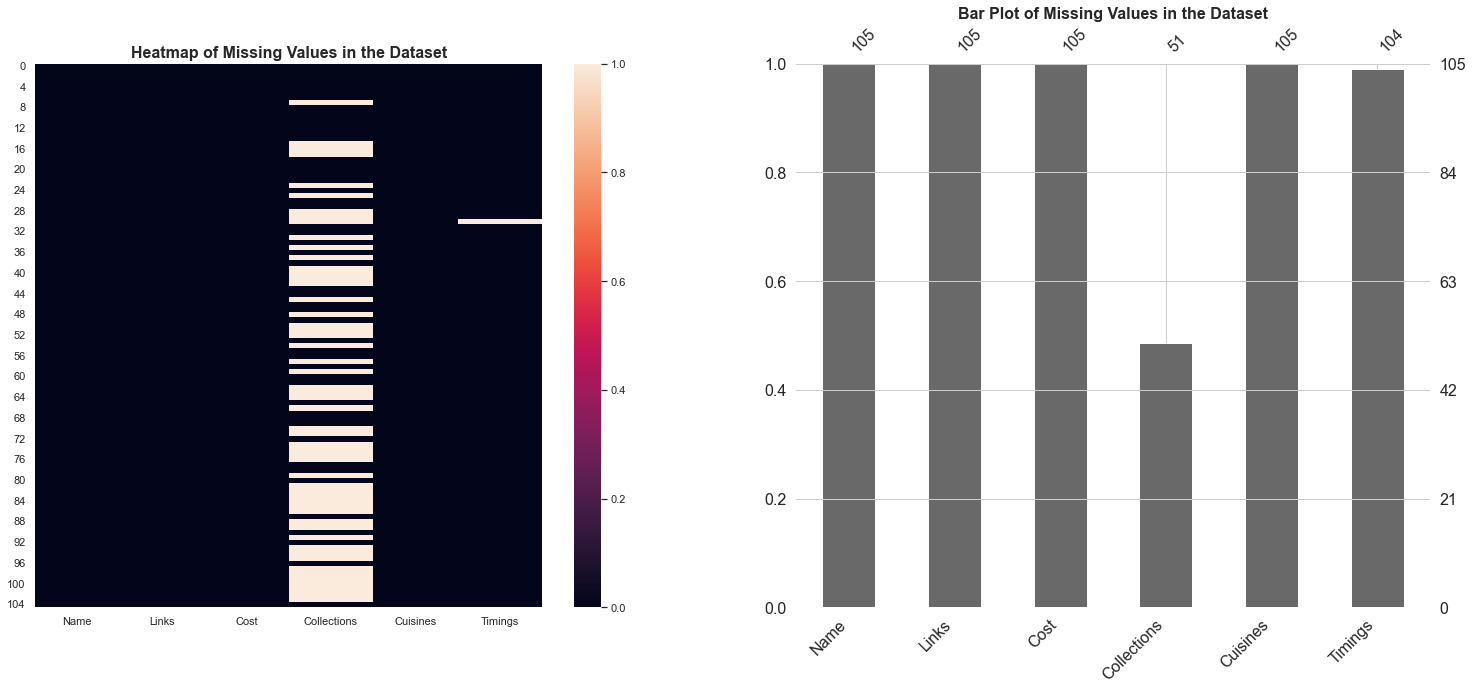

In [32]:
# Visualizing the missing values

print(f"Restaurant Data\n")
show_missing_values(hotel_df)


Review Data



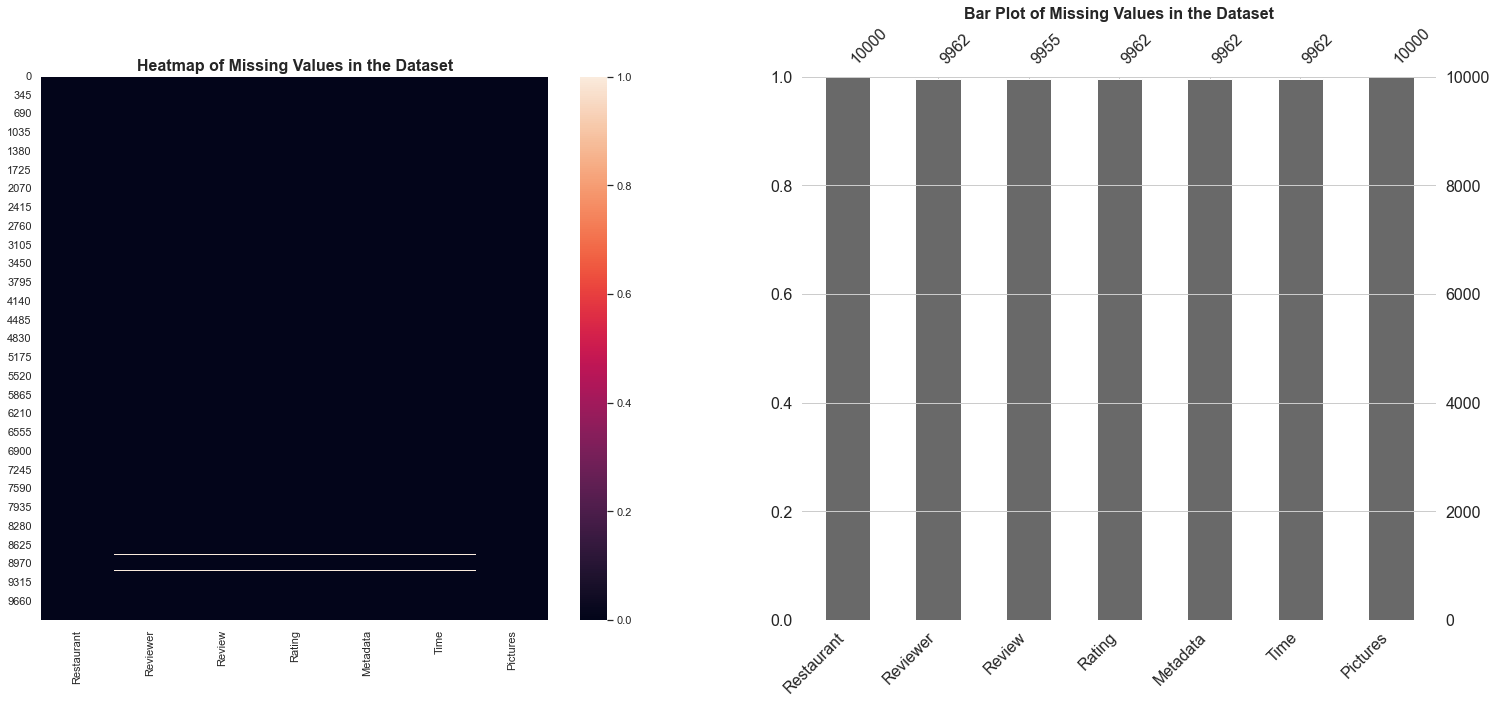

In [33]:
print(f"Review Data\n")
show_missing_values(review_df)

### What did you know about your dataset?

**Restaurant DataSet**
* There are a total of 105 observations and 6 features.
* Features "Collections" and "Timings" have missing values viz. 54 and 1 respectively.
* There is no duplicate records i.e., 105 unique observations.
* Feature "Cost" is an amount but has an "object" data type. This will have to converted later to "int" data type.

**Review DataSet**
* There are at total 10000 observations and 7 features.
* Features "Reviewer", "Rating", "Metadata", "Time" have 38 missing values each and "Review" has 45 missing values. 
* There are 36 duplicate records in the dataset. 
* "Rating" should be "int" data type as it represents ordinal data. Currently, it has an "object" data type.
* "Timing" represents the time when review was posted but has an "object" data type. This should be converted into "datetime" data type.


## ***2. Understanding Your Variables***

In [42]:
# Dataset Columns

print("Restaurant Data Columns:\n")
print(hotel_df.columns.to_list())

print(f"\n{'*'*100}\n")

print("Review Data Columns:\n")
print(review_df.columns.to_list())

Restaurant Data Columns:

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

****************************************************************************************************

Review Data Columns:

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [40]:
# Dataset Describe

print("Restaurant Data Stats:\n")
hotel_df.describe(include="all").T


Restaurant Data Stats:



,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [41]:
print("Review Data Stats:\n")
review_df.describe(include="all").T

Review Data Stats:



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


### Variables Description

**Restaurant Data**
* **Name:** Name of Restaurants.

* **Links:** URL Links of Restaurants.

* **Cost:** Per person estimated Cost of dining.

* **Collection:** Tagging of Restaurants w.r.t. Zomato categories.

* **Cuisines:** Cuisines served by Restaurants.

* **Timings:** Restaurant Timings.

**Review Data**
* **Restaurant:** Name of the Restaurant.

* **Reviewer:** Name of the Reviewer.

* **Review:** Review Text.

* **Rating:** Rating Provided by Reviewer.

* **MetaData:** Reviewer Metadata - No. of Reviews and Followers.

* **Time:** Date and Time of Review.

* **Pictures:** Number of pictures posted with review.

### Check Unique Values for each variable.

In [46]:
# Check Unique Values for each variable.

print("Restaurant Data\n\nNumber of unique values in:\n")
for i in hotel_df.columns.tolist():
    print(f'{i} : {hotel_df[i].nunique()}')
    
print(f"\n{'*'*50}\n")

print("Review Data\n\nNumber of unique values in:\n")
for i in review_df.columns.tolist():
    print(f'{i} : {review_df[i].nunique()}')

Restaurant Data

Number of unique values in:

Name : 105
Links : 105
Cost : 29
Collections : 42
Cuisines : 92
Timings : 77

**************************************************

Review Data

Number of unique values in:

Restaurant : 100
Reviewer : 7446
Review : 9364
Rating : 10
Metadata : 2477
Time : 9782
Pictures : 36


## 3. ***Data Wrangling***

In [95]:
# Create a copy of the original datasets

restaurant_data = hotel_df.copy()
review_data = review_df.copy()

### Data Wrangling on Restaurant Data

**1. Duplicate Values**

We noticed earlier that there are **No Duplicate Values** in the **Restaurant Data**.

**2. Null / Missing Values**

We noted earlier that there were a quite a few missing values in the Restaurant Dataset. Let's address those now.

In [77]:
def missing_values_percent(df, df_null_cols):
    
    '''
    This function calculates the percentage of missing values for the given columns in the dataset.
    
    Args:
        df: A Pandas DataFrame Object.
        df_null_cols - list: List of columns with null values.
        
    Returns:
        A dictionary with column name as "key" and tuple of null values count and null values percentage as "value".
    '''
   
    df_null_dict = {}

    for col in df_null_cols:
        df_null_dict[col] = (df[col].isnull().sum(), round(df[col].isnull().sum() / len(df), 2))
    
    return df_null_dict


In [96]:
restaurant_null_cols = ["Collections", "Timings"]
print("Missing Values Count and Percentage in Restaurant Data:")
missing_values_percent(restaurant_data, restaurant_null_cols)

Missing Values Count and Percentage in Restaurant Data:


{'Collections': (54, 0.51), 'Timings': (1, 0.01)}

**Observation:** The percentage of null values in "Collections" is 52% and in all the other columns is very almost 0%.  
**Action:** Drop "Collections" column from Restaurant Data as the missing values percentage is more than 50% and drop all the rows with missing values in all the other columns since percentage is miniscule.

In [97]:
# Drop missing values
restaurant_data = restaurant_data.drop("Collections", axis=1)
restaurant_data = restaurant_data.dropna()

In [98]:
# Check Missing Values/Null Values Count

print(f"Missing Values in Restaurant Data:\n")
print(restaurant_data.isnull().sum())


Missing Values in Restaurant Data:

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64


There are **No Null / Missing Values** in the **Restaurant Dataset** now.

**3. Other Transformations**

In the Restaurant Data, we notice that the most meaningful columns for our analysis could be Name, Cost, Cuisines. Let's clean and standardize this data so that it could later be merged into Review Dataset using Name as the primary key.

* **Cost:** Convert data type of "Cost" from object to int.
* **Cuisines:** Standardize the Cuisine names, convert to list and store it in a new column "Cuisine_List".

In [99]:
# Convert data type of "Cost" from object to int.
restaurant_data["Cost"] = restaurant_data["Cost"].apply(lambda x: x.replace(",", "")).astype(int)

In [124]:
# Standardize "Cuisines" data, convert to a list and store in a new column "Cuisine_List".
restaurant_data["Cuisine_List"] = restaurant_data["Cuisines"].apply(lambda x: x.lower().replace(" ", "").split(","))

In [125]:
# Include only the "Name", "Cost" and "Cuisine_list" in the updated Restaurant Data.
restaurant_df = restaurant_data[["Name", "Cost", "Cuisine_List"]]

**4. Cleaned Restaurant Data**

In [126]:
# Check the shape and first 5 rows of the Restaurant Dataset to be used for our analysis.

print(f"Shape of Cleaned Restaurant Data: {restaurant_df.shape}\n")

restaurant_df.head()

Shape of Cleaned Restaurant Data: (104, 3)



,Name,Cost,Cuisine_List
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,1300,"[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"[asian, continental, northindian, chinese, med..."


### Data Wrangling on Review Data

**1. Duplicate Values**

We noticed earlier that the **Review Data** has **36 duplicate observations**. Let's see what these duplicates are.

In [100]:
review_duplicates = review_data[review_data.duplicated()]
print("Duplicates in Review Data\n")
review_duplicates

Duplicates in Review Data



,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


**Observation:** All the duplicate observations in "Review Data" have null values.  
**Action:** Since this data does not contain any significant information, we can go ahead and drop these observations.

In [101]:
# Drop duplicates from "Review Data"

review_data = review_data.drop(review_duplicates.index)

In [102]:
# Check for duplicate observations again.
print(f"Number of Duplicate Observations in Review Data: {review_data.duplicated().sum()}")

Number of Duplicate Observations in Review Data: 0


We now have **No Duplicate Observations** in the **Review Data**.

---

**2. Null / Missing Values**

We noted earlier that there were a quite a few missing values in the Review datasets. Let's address those now.

In [103]:
# Review Data

review_null_cols = ["Reviewer", "Review", "Rating", "Metadata", "Time"]
print("Missing Values Count and Percentage in Review Data:")
missing_values_percent(review_data, review_null_cols)

Missing Values Count and Percentage in Review Data:


{'Reviewer': (2, 0.0),
 'Review': (9, 0.0),
 'Rating': (2, 0.0),
 'Metadata': (2, 0.0),
 'Time': (2, 0.0)}

**Observation:** The percentage of null values in all the columns is very almost 0%.  
**Action:** Drop all the rows with missing values since percentage is miniscule.

In [104]:
# Drop missing values

review_data = review_data.dropna()

In [105]:
# Check Missing Values/Null Values Count

print(f"Missing Values in Review Data:\n")
print(review_data.isnull().sum())

Missing Values in Review Data:

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


We now have **No Null / Missing Values** in the **Review Dataset**.

---

**3. Other Transformations**

* **Rating:** Convert data type to int and replace non-numeric values with mean imputation.
* **Metadata:** Extract Reviews and Followers Count and store them in two separate columns.
* **Time:** Convert Time data type to datetime.

In [112]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [111]:
review_data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


**3A. Rating - Mean Imputation** 

In [115]:
review_data["Rating"].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [116]:
review_data[review_data["Rating"]=="Like"]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


**Observation:** The "Rating" column has 1 observation as "Like" and all the other values are numeric.  
**Action:** Convert "Rating" to numeric data type and "Like" to NaN. Then calculate mean rating for the restaurant "The Old Madras Baking Company" for which the rating is "Like" and impute the NaN value using this mean.

In [121]:
# Convert values other than numbers to NaN
review_data["Rating"] = pd.to_numeric(review_data["Rating"], errors="coerce")

# Calculate mean rating for "The Old Madras Baking Company" (TOMBC)
data_TOMBC = review_data[review_data["Restaurant"] == "The Old Madras Baking Company"]
mean_TOMBC = data_TOMBC["Rating"].mean()

# Mean Imputation
review_data["Rating"].fillna(mean_TOMBC, inplace=True)

# Check Unique Values and data type of "Rating" column.
print(f"Unique Rating Values: {review_data['Rating'].unique()}\n")
print(f"Data Type of Rating: {review_data['Rating'].dtype}")

Unique Rating Values: [5.         4.         1.         3.         2.         3.5
 4.5        2.5        1.5        3.61616162]

Data Type of Rating: float64


**3B. Metadata - Extracting Reviews and Followers Count.**

In [170]:
# Converting "Metadata" with reviews and followers count to a list.
metadata = review_data["Metadata"].apply(lambda x: x.split(" , ")).to_frame()

# Extracting Reviews Count and storing in a new column "Number_of_Reviews"
review_data["Number_of_Reviews"] = metadata["Metadata"].apply(lambda x: x[0][0]).astype(int)

# Extracting Followers Count and storing in a new column "Number_of_Followers"
review_data["Number_of_Followers"] = metadata["Metadata"].apply(lambda x: x[1][0] if len(x) > 1 else 0).astype(int)

# View the two new columns created
review_data[["Number_of_Reviews", "Number_of_Followers"]]

,Number_of_Reviews,Number_of_Followers
0,1,2
1,3,2
2,2,3
3,1,1
4,3,2
...,...,...
9995,5,5
9996,2,5
9997,6,4
9998,1,1


**3C. Time - Convert data type to datetime**

In [163]:
review_data["Time"] = pd.to_datetime(review_data["Time"])

# Data Type of "Time"
review_data["Time"].dtype

dtype('<M8[ns]')

**3D. Cleaned Review Data**

* Use the newly created columns viz. "Number_of_Reviews" and "Number_of_Followers" and remove the earlier Metadata column.

In [171]:
# Drop "Metadata" column
review_df = review_data.drop(["Metadata"], axis=1)

# Print shape of the Cleaned Review Data and first 5 rows.
print(f"Shape of Cleaned Review Data: {review_df.shape}\n")

review_df.head()

Shape of Cleaned Review Data: (9955, 8)



,Restaurant,Reviewer,Review,Rating,Time,Pictures,Number_of_Reviews,Number_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2


In [172]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Restaurant           9955 non-null   object        
 1   Reviewer             9955 non-null   object        
 2   Review               9955 non-null   object        
 3   Rating               9955 non-null   float64       
 4   Time                 9955 non-null   datetime64[ns]
 5   Pictures             9955 non-null   int64         
 6   Number_of_Reviews    9955 non-null   int32         
 7   Number_of_Followers  9955 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(3)
memory usage: 880.2+ KB


## Merge the Datasets

In [173]:
merged_df = pd.merge(review_df, restaurant_df, left_on="Restaurant", right_on="Name")

# Shape of the Merged Dataset
print(f"Shape of the Merged Data: {merged_df.shape}\n")

# Display the first 5 rows.
merged_df.head()

Shape of the Merged Data: (9855, 11)



,Restaurant,Reviewer,Review,Rating,Time,Pictures,Number_of_Reviews,Number_of_Followers,Name,Cost,Cuisine_List
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."


### What all manipulations have you done and insights you found?

The following table summarizes the manipulations done to the original datasets:

<div style="text-align: center; font-size: 15px; font-weight: bold;">Data Manipulation</div>

| Dataset | Original Dataset Feature | Processed Dataset Feature | Reason (Insights) |
|:-----: | :-----: |  :-----: | :-----: |
| Restaurant | Collections | NA | Dropped the column as missing values were > 50%. |
| Restaurant | Timings | Timings | There was 1 missing value hence dropped that row. |
| Restaurant | Cost | Cost | Converted data type from object to int. |
| Restaurant | Cuisines | Cuisine_List | Created a new feature "Cuisine_List" to store all the standardized cusine names in a list. |
| Review | All | All | Identified and Removed 36 duplicate records which had all null values against restaurant names. |
| Review | Reviewer, Review, Rating, Metadata, Time | Reviewer, Review, Rating, Metadata, Time | Dropped all rows with missing values since their percentage was miniscule. |
| Review | Rating | Rating | Converted data type from object to numeric with mean imputation for non-numeric values. |
| Review | Metadata | Number_of_Reviews, Number_of_Followers | Extracted Reviews and Followers Count and stored them in two separate columns, changed their data type to int and dropped Metadata column. |
| Review | Time | Time | Converted data type from object to datetime. |

* **Cleaned Restaurant Data:** Filtered the dataset to select only 3 features to be used for analysis viz. Name, Cost, Cuisine_List.
* **Cleaned Review Data:** Consists of all the features including the newly created ones except Metadata.
* **Merged Data:** Merged the Cleaned Restaurant Data and Cleaned Review Data into a new dataframe. This new dataframe with a shape of 9855 rows and 11 features will be used for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

**Function to plot multiple subplots of type - QQplot, PieChart, BoxPlot, ViolinPlot, Histogram, BarPlot, CountPlot, ScatterPlot**

In [188]:
def multiple_subplots(subplot_list, n_row, n_col, figsize, suptitle, plot_type, df, common_y_variable=None,\
                      target=False, target_var=None, estimator="mean", suptitle_fontsize=16):
    '''
    This function creates multiple subplots of QQPlot, PieChart, BoxPlot, ViolinPlot, Histogram, BarPlot, CountPlot, ScatterPlot.
    
    Args:
        subplot_list - list : This is a list of all the dataframe variables for which data is to be plotted.
        n_row - int : Number of rows for the subplots.
        n_col - int : Number of columns for the subplots.
        figsize - tuple of int : Tuple mentioning the dimension of the plotting area.
        suptitle - str : Main title or heading of the plot.
        plot_type - str : Type of plot, select from ["qqplot", "pie", "boxplot", "violinplot", "histplot", "barplot", "countplot", "scatterplot"].
        df - Pandas DataFrame Object : A Pandas DataFrame.
        common_y_variable - str: Optional: The common y-variable for plotting bar plots, default=None.
        target - bool: Optional: Boolean value if visualization is required target wise, default=False.
        target_var - str: Optional: The target variable if target is set to "True", default=None.
        estimator - str: Optional: The bar plot estimator, select from "mean" or "sum", defalut="mean".
        suptitle_fontsize - int : Fontsize of the main title, default value = 16
        
    Returns:
        Plotted Graphical Plots in n_row and n_col in an area of the figsize.
    '''
    
    # Define list of plots
    plots = ["qqplot", "pie", "boxplot", "violinplot", "histplot", "barplot", "countplot", "scatterplot"]
    
    # List of columns/variables to be plotted.
    lst = subplot_list
    
    # Create subplots with a n_row x n_col layout
    fig, axes = plt.subplots(n_row, n_col, figsize=figsize)
    fig.suptitle(suptitle, fontsize=suptitle_fontsize, fontweight="bold")
    
    # Flatten the axes array to iterate over subplots
    axes = axes.flatten()
    
    # Delete the extra subplot
    if (n_row*n_col) > len(lst):
        n_ax_to_remove = (n_row*n_col) - len(lst)
        for i in range(1, n_ax_to_remove+1):
            fig.delaxes(axes[-i])
        
    # Plot the data
    
    # Raise a NameError if plot_type is not from the available plot_types.
    if plot_type not in plots:
        raise NameError('Plot not available! Please select from \
        ["qqplot", "pie", "boxplot", "violinplot", "histplot", "barplot", "countplot", "scatterplot"]')
    
    # Code to plot the different plots.
    try:    
        for i in range(len(lst)):
            if plot_type == "qqplot":
                sm.qqplot(df.loc[:, lst[i]], line='45', ax=axes[i])
            elif plot_type == "pie":
                colors = sns.color_palette('pastel')
                counts = df[lst[i]].value_counts()
                axes[i].pie(counts, labels=counts.index, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
            elif plot_type == "boxplot":
                sns.boxplot(x=target_var if target else None, y=lst[i], data=df, ax=axes[i])
            elif plot_type == "violinplot":
                sns.violinplot(x=target_var if target else None, y=lst[i], data=df, ax=axes[i])
            elif plot_type == "histplot":
                sns.histplot(x=lst[i], data=df, hue=target_var if target else None, ax=axes[i], kde=True)
            elif plot_type == "scatterplot":
                sns.scatterplot(x=lst[i], y=common_y_variable, data=df, hue=target_var if target else None, ax=axes[i], alpha=0.5)
            elif plot_type == "countplot":
                order = df.groupby(lst[i])[common_y_variable].count().sort_values(ascending=False).index
                sns.countplot(x=lst[i], data=df, hue=target_var if target else None, ax=axes[i], order=order)
            elif plot_type == "barplot":
                if estimator == "mean":
                    order = df.groupby(lst[i])[common_y_variable].mean().sort_values(ascending=False).index
                    sns.barplot(x=lst[i], y=common_y_variable, hue=target_var if target else None, data=df, ax=axes[i], estimator=np.mean, order=order)
                elif estimator == "sum":
                    order = df.groupby(lst[i])[common_y_variable].sum().sort_values(ascending=False).index
                    sns.barplot(x=lst[i], y=common_y_variable, hue=target_var if target else None, data=df, ax=axes[i], estimator=sum, order=order)

            axes[i].set_title(f"{lst[i]}", fontdict={'fontsize':15, 'fontweight':'bold'})
            axes[i].set_xlabel("")
            axes[i].set_ylabel("")
            
    except NameError as e:
        # Catch the error and print the error message.
        print(f"An error occured: {e}")
        
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

**Function to plot multiple figure level plots of type - CountPlot, BarPlot, ScatterPlot**

In [189]:
def show_fig_plot(df, x_feature, figsize, col, plot_type, aspect, col_wrap, suptitle, title_plot_adjust, between_plot_adjust=None, \
                       hue=None, order=None, y_feature=None, height=6):
    '''
    This function shows a countplot, barplot, scatterplot for multiple variables simultaneously.
    
    Args:
        df - Pandas DataFrame Object: A Pandas Dataframe.
        x_feature - str: The feature to be plotted on the x-axis.
        figsize - tuple of int: Tuple containing the dimension of the plotting area.
        col - str: The feature whose categories are to be plotted column wise.
        plot_type - str: Select from ["count", "bar", "scatter"]
        aspect - float: The aspect ratio.
        col_wrap - int: Number of columns to be plotted on each row.
        suptitle - str: The main title for whole plot.
        title_plot_adjust - float: Space adjustment value between suptitle and plot.
        between_plot_adjust - float (Optional): Space adjustment value between two plots, default=None
        hue - str (Optional): Additional feature to analyze in each plot, default=None
        order (Optional): order of bars, default=None
        y_feature - str (Optional): y-axis feature in case of barplot, scatterplot, default=None
        height - int (Optional): Height of plots, default=6
        
    Returns:
        Multi-dimensional Count Plot.
    '''
    
    # Define list of plots
    plots = ["count", "bar", "scatter"]
    
    # Set the figure
    plt.figure(figsize=figsize)
    
    # Plot the chart
    
    # Raise a NameError if plot_type is not from the available plot_types.
    if plot_type not in plots:
        raise NameError('Plot not available! Please select from ["bar", "count", "scatter"]')
    
    # Code to plot the different plots.
    try:
        if plot_type == "count":
            sns.catplot(x=x_feature, data=df, kind="count", hue=hue, col=col, height=height, aspect=aspect, \
                        col_wrap=col_wrap, order=order)
        elif plot_type == "bar":
            sns.catplot(x=x_feature, y=y_feature, data=df, kind="bar", hue=hue, col=col, height=height, aspect=aspect, \
                        col_wrap=col_wrap, order=order)
        elif plot_type == "scatter":
            sns.relplot(x=x_feature, y=y_feature, data=df, kind="scatter", hue=hue, col=col, height=height, aspect=aspect, \
                      col_wrap=col_wrap)
            
    except NameError as e:
        # Catch the error and print the error message.
        print(f"An error occurred: {e}")
    
    # Set title and adjustments
    plt.suptitle(suptitle, fontsize=18, fontweight="bold")
    plt.subplots_adjust(top=title_plot_adjust)
    plt.subplots_adjust(hspace=between_plot_adjust)
    
    # Show the plot
    plt.show()

Let's identify the best restaurants in terms of Rating. To do this, we'll set a threshold of 4.5 meaning that restaurants with an average rating of >= 4.5 will be considered as highest rated restaurants.

The dataset contains 99 unique restaurants. To make sense of restaurants in terms of rating, let's group the restaurants into 3 categories as follows:
> * Highest_Rated with Rating $\geq$ 4.0
> * Moderate_Rated with Rating $\geq$ 3.5 and $<$ 4.0
> * Low_Rated with Rating $<$ 3.5

In [220]:
# Calculate average rating for each restaurant
restaurant_mean_ratings = merged_df.groupby("Restaurant")["Rating"].mean()

# Define a function to assign rating category
def assign_rating_category(avg_rating):
    if avg_rating >= 4.0:
        return "High_Rated"
    elif avg_rating >= 3.5:
        return "Moderate_Rated"
    else:
        return "Low_Rated"

# Create a new column "Rating_Category" based on the average rating
merged_df['Rating_Category'] = merged_df["Restaurant"].map(restaurant_mean_ratings).apply(assign_rating_category)

# Print the updated DataFrame
merged_df[["Restaurant", "Rating", "Rating_Category"]]

,Restaurant,Rating,Rating_Category
0,Beyond Flavours,5.0,High_Rated
1,Beyond Flavours,5.0,High_Rated
2,Beyond Flavours,5.0,High_Rated
3,Beyond Flavours,5.0,High_Rated
4,Beyond Flavours,5.0,High_Rated
...,...,...,...
9850,Chinese Pavilion,3.0,Moderate_Rated
9851,Chinese Pavilion,4.5,Moderate_Rated
9852,Chinese Pavilion,1.5,Moderate_Rated
9853,Chinese Pavilion,4.0,Moderate_Rated


In [209]:
merged_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'Number_of_Reviews', 'Number_of_Followers', 'Name', 'Cost',
       'Cuisine_List', 'Rating_Category'],
      dtype='object')

In [221]:
restaurant_mean_ratings.sort_values(ascending=False)

Restaurant
AB's - Absolute Barbecues         4.880
B-Dubs                            4.810
3B's - Buddies, Bar & Barbecue    4.760
Paradise                          4.700
Flechazo                          4.660
                                  ...  
Behrouz Biryani                   2.825
Mathura Vilas                     2.820
Pakwaan Grand                     2.710
Asian Meal Box                    2.580
Hotel Zara Hi-Fi                  2.400
Name: Rating, Length: 99, dtype: float64

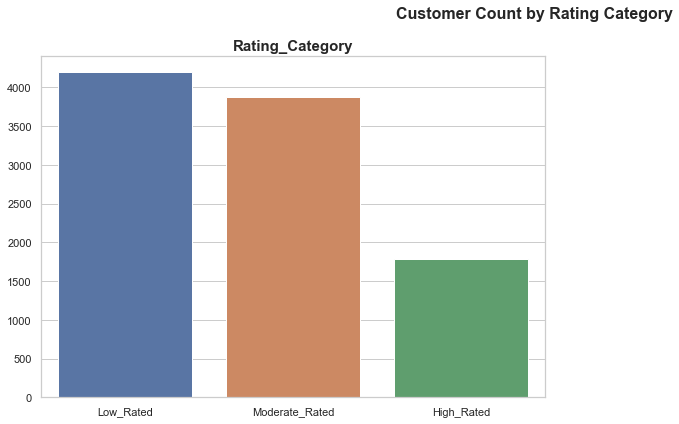

In [223]:
multiple_subplots(["Rating_Category"], 1, 2, (15,6), "Customer Count by Rating Category", "countplot", merged_df, "Restaurant")

Observation: Total number of customers visiting "Low_Rated" restaurants is highest and those visiting "High_Rated" is lowest.

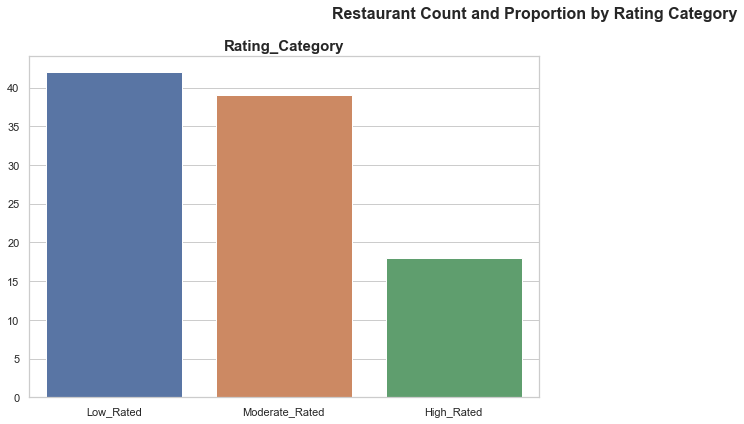

([<matplotlib.patches.Wedge at 0x2932e8ae820>,
 [Text(-0.5947049149539251, 0.9253788759906101, 'High_Rated'),
  Text(-0.6799748210598089, -0.8646584543764555, 'Low_Rated'),
  Text(1.0395008464867046, 0.3597749159591658, 'Moderate_Rated')],
 [Text(-0.3243844990657773, 0.5047521141766963, '18.2%'),
  Text(-0.37089535694171394, -0.4716318842053393, '42.4%'),
  Text(0.5670004617200206, 0.19624086325045406, '39.4%')])

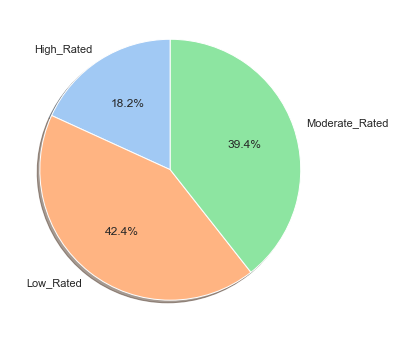

In [245]:
# Let's visualize the count of these differently rated restaurants.

# Prepare Data
unique_restaurants_by_category = merged_df.drop_duplicates(subset=["Restaurant"]).groupby("Rating_Category").size()\
                                .reset_index().rename(columns = {0: "Num_Restaurants"})

# Bar plot
multiple_subplots(["Rating_Category"], 1, 2, (15,6), "Restaurant Count and Proportion by Rating Category", "barplot", \
                  unique_restaurants_by_category, "Num_Restaurants")

# Pie Chart
plt.figure(figsize=(15,6))
colors = sns.color_palette('pastel')
plt.pie(unique_restaurants_by_category["Num_Restaurants"], labels=unique_restaurants_by_category["Rating_Category"],\
        autopct='%1.1f%%', startangle=90, shadow=True, colors=colors)

Observation: About 18% of total restaurants are High_Rated ones and about 40% are Moderate to Low Rated.

In [246]:
merged_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Number_of_Reviews,Number_of_Followers,Name,Cost,Cuisine_List,Rating_Category
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated


Now lets analyze the average cost for all restaurant categories.


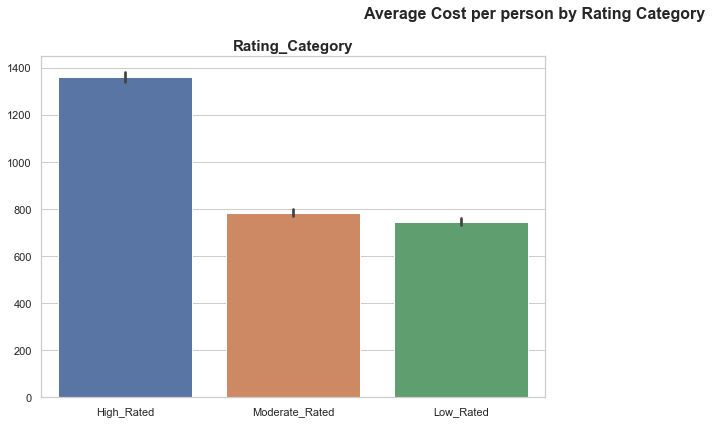

In [247]:
# Bar plot
multiple_subplots(["Rating_Category"], 1, 2, (15,6), "Average Cost per person by Rating Category", "barplot", merged_df, "Cost")

The Average Cost of dining per person is the highest in high rated restaurants while it is almost equal in moderate and low rated restaurants.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

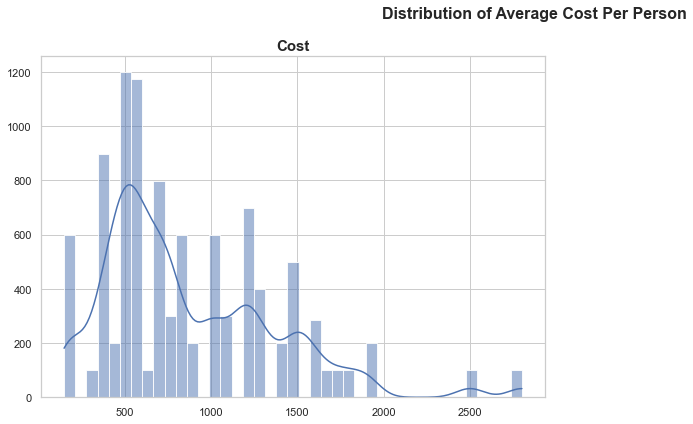

In [248]:
# Chart - 4 visualization code

# View distribution of Cost Data

# Bar plot
multiple_subplots(["Cost"], 1, 2, (15,6), "Distribution of Average Cost Per Person", "histplot", merged_df)

In [249]:
merged_df["Cost"].describe()

count    9855.000000
mean      871.491629
std       506.033525
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64

Insights:
* The average cost of dining per person is 872 with a standard deviation of 506.
* The cost range is wide with a minimum of 150 and maximum of 2800.
* The highest frequency of customer spends is in the range of 500 to 600 indicating most customers dine at moderate to low rated restaurants which corroborates our initial analysis.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

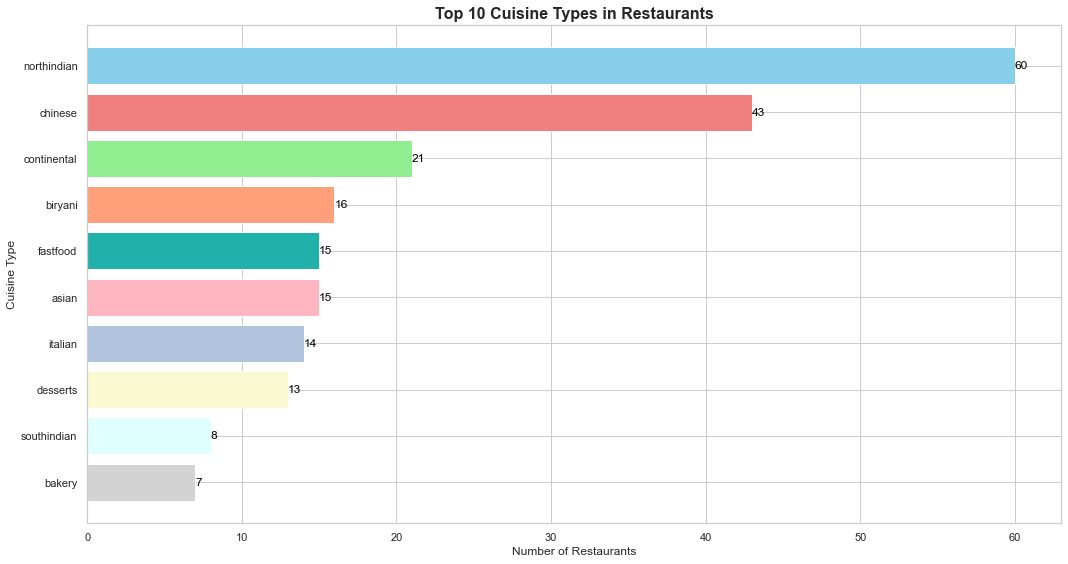

In [261]:
# Chart - 5 visualization code

# Most Popular Cuisines.

all_cuisines = []

# Iterate over each observation in "Cuisine_List" column to extract cuisine name and then append it to an all_cuisines list.
for cuisine_list in restaurant_df["Cuisine_List"]:
    for cuisine in cuisine_list:
        all_cuisines.append(cuisine)
        
# Count the occurrences of each cuisine type
cuisine_counts = pd.Series(all_cuisines).value_counts()

# Choose the top N cuisine types to display on the y-axis
top_n = 10  # This value can be updated as per requirements.
cuisine_counts = cuisine_counts.head(top_n)

# custom color palette
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightsteelblue',\
          'lightgoldenrodyellow', 'lightcyan', 'lightgray']

# Create the bar chart
plt.figure(figsize=(15, 8))
bars = plt.barh(cuisine_counts.index, cuisine_counts.values, color=colors)

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', ha='left', va='center', fontsize=12, color='black')

plt.title(f'Top {top_n} Cuisine Types in Restaurants', fontdict={"fontsize":16, "fontweight":"bold"})
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most common cuisine at the top

plt.tight_layout()
plt.show()

Insights:

* The most common and popular cuisine seems to be "northindian" while "southindian" and "bakery" seem to be the least popular.

In [262]:
merged_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'Number_of_Reviews', 'Number_of_Followers', 'Name', 'Cost',
       'Cuisine_List', 'Rating_Category'],
      dtype='object')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***